<a href="https://colab.research.google.com/github/0seoyeon/tobigs-21st/blob/%EA%B3%B5%EC%84%9C%EC%97%B0/Week2/Optimization/%EA%B3%B5%EC%84%9C%EC%97%B0/Tobigs_Week2_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# 현재 작업 디렉토리 확인
current_directory = os.getcwd()
print("Current directory:", current_directory) # /content

# 작업 디렉토리 내의 파일 목록 확인
# os.listdir(current_directory)

# 작업 디렉토리 변경
new_directory = os.chdir('/content/drive/MyDrive/Tobigs/regular_session')
current_directory = os.getcwd()
print('Current directory:', current_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current directory: /content/drive/My Drive/Tobigs/regular_session
Current directory: /content/drive/MyDrive/Tobigs/regular_session


In [ ]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('./data/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
**똑같이 X_test에다 fit하면 안돼요!**

In [ ]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns) # fit_transform() 대신 transform() 사용: X_train에 fit한 scaler를 그대로 적용
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수
N = len(X_train.loc[0]) # 3

In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy() # 얕은 복사
parameters

array([0.50210549, 0.75187647, 0.05822907])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z =\theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$

$\text{n: number of features}$

In [ ]:
def dot_product(X, parameters):
    z = sum([X[i] * parameters[i] for i in range(len(X))]) + 1 # +1: bias
    return z

In [ ]:
# 확인
z_result = dot_product(X_train.loc[0], parameters)
z_result

1.588825443516698

## Logistic Function

## $p = \frac{1}{1+e^{-z}}$

In [ ]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1 / (1 + np.exp(-z))
    return p

In [ ]:
logistic(X_train.iloc[0], parameters)

0.830450787021885

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수 : MSE
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2, \space i = 1, ..., N(\text{Number of samples})$
$l(\theta) =  \frac{1}{2}\Sigma(y_i - z_i)^2$

참고)
$z_i = \hat{y_i} = \theta^{T}X_i$.   
1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma{[y_i logp_i + (1-y_i)log(1-p_i)]}$

$wh. \space p = \frac{1}{1+e^{-z}}$

In [ ]:
def minus_log_cross_entropy_i(X, y, parameters): # X: 1 sample
    loss = -y * np.log(logistic(X, parameters)) - (1 - y) * np.log(1 - logistic(X, parameters)) # sigmoid함수 특성에 의해 logistic값은 절대 0이나 1이 되지 않으므로 log취할 수 있다.
    return loss

In [ ]:
def mse_i(X, y, parameters): # X: 1 sample
    loss = (y - dot_product(X, parameters))**2
    loss /= 2 # 계산의 편의를 위해 2로 나눠줌.
    return loss

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): # n: 배치 사이즈
    loss = 0
    for i in range(len(X_set)):  # 반복문에서 인덱스 오류 수정(X_set이 batch_size보다 작은 경우, 즉 마지막 배치)
        loss += loss_function(X_set.iloc[i], y_set.iloc[i], parameters)  # sum of the loss from batch samples

    loss /= n #loss 평균값으로 계산
    return loss


In [ ]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

1.622559090649511

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.5705298912239376

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma_{i}(y_i - \theta^{T}X_i)\cdot x_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma_{i}(y_i - p_i)x_{ij}$   
$\text{j = index of the parameter}$

In [ ]:
def get_gradient_ij(X, y, parameters, j, model): # gradient of jth parameter
# X: 1 sample
    if model == 'linear':
        gradient = - (y - dot_product(X, parameters))*X[j]
    elif model == 'logistic':
        gradient = - (y - logistic(X, parameters))*X[j]
    return gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'linear') # 1: 첫번째 parameter에 대해서 계산

0.11120719992804357

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic') # 1: 첫번째 parameter에 대해서 계산

-0.03177680026367921

In [ ]:
# from IPython.display import Image

# Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model): # batch_size로 나누는 것은 'step'함수에서 update할 때 수행된다.
    num_features = len(parameters)
    gradients = np.zeros(num_features)

    # batch gradient 계산 (sigma_i)
    for j in range(len(parameters)):
      for i in range(len(X_set)):
          x_i = X_set.iloc[i]
          y_i = y_set.iloc[i]

          gradients[j] += get_gradient_ij(x_i, y_i, parameters, j, model)

    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

array([186.36835724, 101.95892218, 107.57046552])

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

array([76.94230192, -0.79553664, 27.38359911])

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:

- N: 훈련 데이터셋의 전체 샘플 개수
- nb: 미니배치의 개수
- idx: 전체 샘플 개수에 대한 인덱스 배열
- idx_list: 각 미니배치의 인덱스 리스트(미니배치의 크기에 따라 인덱스를 나누기)

예를 들어, X_train의 샘플이 100개이고 batch_size가 30이라면, 미니배치 인덱스 리스트는 각 미니배치마다 30개의 샘플을 갖게 되고, 마지막 미니배치는 10개의 샘플을 갖는다.  
[[1, 2, 3, ..., 30], [31, 32, ..., 60], [61, 62, ..., 90], [91, 92, ..., 100]]

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n: 현재 배치의 데이터 수
    for j in range(len(parameters)):
        parameters[j] -= (learning_rate * gradients[j] / n)
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.51732623, 0.7517088 , 0.06366582])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 한 번에 학습시킬 데이터 크기
- epoch: 모든 mini batch를 다 사용  
- num_epoch: 총 학습 횟수
<br>

BGD: 학습 한 번에 전체 데이터를 모두 사영하여 gradient 계산   
SGD: 학습 한 번에 1개의 데이터를 사용하여 gradient를 계산  
MGD: 학습 한 번에 1개의 데이터를 사용하여 gradient를 계산  
<br>

**batch_size에 따른 경사하강법의 종류**  
batch_size=1 -> Stochastic Gradient Descent  
batch_size=k -> Mini Batch Gradient Descent  
batch_size=whole -> (Batch) Gradient Descent  

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N) # 파라미터 임의로 초기화
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)

    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,] # 미니배치 생성
            y_batch = y_train.iloc[idx]

            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size) # 배치 loss
            gradients = batch_gradient(X_batch, y_batch, parameters, model) # 미니 배치 그래디언트
            parameters = step(parameters, gradients, learning_rate, batch_size) # 파라미터 업데이트


            #중단 조건
            if abs(new_loss - loss) < tolerance: # loss 감소량이 tolerance 미만이면 중단하겠다.
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=X_train.shape[0]) # batch gradient descent (batch size: 전체 데이터셋)
new_param_bgd

epoch: 0  loss: 1.1420275455135356  params: [0.15042303 0.52883219 0.27880342]  gradients: [69.26765089  1.041243   31.41969136]
epoch: 100  loss: 0.4507179790799826  params: [-1.75192401  0.92907816 -0.84460998]  gradients: [ 8.10251558 -8.7125125   9.26580598]
epoch: 200  loss: 0.38956828309520114  params: [-2.03075429  1.43550321 -1.35112591]  gradients: [ 2.26388175 -6.51764316  6.36945867]
epoch: 300  loss: 0.3601751804554664  params: [-2.1444071   1.81310562 -1.71860102]  gradients: [ 1.36669463 -4.94335245  4.79340488]
epoch: 400  loss: 0.34281285332575  params: [-2.22452032  2.10584023 -2.00161491]  gradients: [ 1.07463289 -3.91710204  3.7755772 ]
epoch: 500  loss: 0.3315997885090201  params: [-2.2899978   2.34179495 -2.22845116]  gradients: [ 0.90169528 -3.20881177  3.07681014]
epoch: 600  loss: 0.3239133511743186  params: [-2.34560386  2.53751633 -2.41570385]  gradients: [ 0.77312778 -2.69320892  2.57103827]
epoch: 700  loss: 0.31841326315981666  params: [-2.39358906  2.70332

array([-2.50460511,  3.07889825, -2.92936314])

In [ ]:
# 모델 정확도
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1) # stochastic gradient descent (batch size: 1)
new_param_sgd

epoch: 0  loss: 0.3066597962207803  params: [-1.80387661  1.09298074 -1.22656669]  gradients: [0.26409909 0.14372297 0.18581767]
epoch: 100  loss: 0.07837831463551066  params: [-2.93032567  4.17501946 -4.06769109]  gradients: [0.07538543 0.04102483 0.05304049]
epoch: 200  loss: 0.07837416195685158  params: [-2.9303681   4.1751431  -4.06780374]  gradients: [0.0753816  0.04102274 0.05303779]
epoch: 300  loss: 0.07837416161020425  params: [-2.9303681   4.17514311 -4.06780375]  gradients: [0.07538159 0.04102274 0.05303779]
epoch: 400  loss: 0.07837416161017663  params: [-2.9303681   4.17514311 -4.06780375]  gradients: [0.07538159 0.04102274 0.05303779]
epoch: 500  loss: 0.07837416161017663  params: [-2.9303681   4.17514311 -4.06780375]  gradients: [0.07538159 0.04102274 0.05303779]
epoch: 600  loss: 0.07837416161017663  params: [-2.9303681   4.17514311 -4.06780375]  gradients: [0.07538159 0.04102274 0.05303779]
epoch: 700  loss: 0.07837416161017663  params: [-2.9303681   4.17514311 -4.0678

array([-2.9303681 ,  4.17514311, -4.06780375])

In [ ]:
# 모델 정확도
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_sgd)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


In [ ]:
new_param_mgd = gradient_descent(X_train, y_train) # minibatch gradient (batch size: 16)
new_param_mgd

epoch: 0  loss: 0.5741809894506735  params: [-0.04712887  0.08662282  0.47853012]  gradients: [3.86240017 3.37539689 4.32080004]
epoch: 100  loss: 0.08349838853422051  params: [-2.47943593  2.98051608 -2.84425241]  gradients: [0.53841711 0.76321958 0.98256195]
epoch: 200  loss: 0.07157869960245086  params: [-2.68380478  3.65323844 -3.47482013]  gradients: [0.50977979 0.74556474 0.89393309]
epoch: 300  loss: 0.06742453160965807  params: [-2.77331881  3.9436952  -3.74434275]  gradients: [0.50266194 0.74072896 0.8637826 ]
epoch: 400  loss: 0.06554744248747771  params: [-2.81805778  4.08823935 -3.87788712]  gradients: [0.50001312 0.73883842 0.85032951]
epoch: 500  loss: 0.06460585456640601  params: [-2.84166896  4.16437828 -3.94808102]  gradients: [0.49882449 0.73796612 0.84362577]
epoch: 600  loss: 0.06410928625121277  params: [-2.85446064  4.20558845 -3.98603074]  gradients: [0.4982362  0.73752749 0.84010305]
epoch: 700  loss: 0.06384055504316269  params: [-2.86148516  4.22820759 -4.0068

array([-2.86872053,  4.25149745, -4.02827258])

In [ ]:
# 모델 정확도
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.92


## Hyperparameter 조정
### mini batch size = 32, 64, 128

In [ ]:
new_param_mgd32 = gradient_descent(X_train, y_train, batch_size=32) # minibatch gradient (bah size: 32)
new_param_mgd32

epoch: 0  loss: 0.7154747926016725  params: [-0.15948152  0.39404816  0.0914636 ]  gradients: [8.94033014 3.94999686 8.62347981]
epoch: 100  loss: 0.23842286253151568  params: [-2.27359257  2.27786196 -2.17191993]  gradients: [0.49589228 0.09108943 1.18346201]
epoch: 200  loss: 0.21805887610611074  params: [-2.4873706   3.01449145 -2.87278342]  gradients: [0.87005295 0.20560616 0.60096461]
epoch: 300  loss: 0.21173849408677692  params: [-2.60848985  3.41612463 -3.25013288]  gradients: [1.06725985 0.26538682 0.35885354]
epoch: 400  loss: 0.20913185123801695  params: [-2.68517149  3.66742507 -3.48458462]  gradients: [1.18623504 0.30080162 0.22762332]
epoch: 500  loss: 0.20789514644421142  params: [-2.73666061  3.83523927 -3.64046404]  gradients: [1.26339812 0.32339984 0.14736183]
epoch: 600  loss: 0.2072550463002713  params: [-2.77244927  3.95151762 -3.74816093]  gradients: [1.3156929  0.33851505 0.09486929]
epoch: 700  loss: 0.20690250390156845  params: [-2.79787488  4.03396335 -3.82437

array([-2.83924781,  4.1678557 , -3.94787388])

In [ ]:
# 모델 성능
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd32)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


In [ ]:
new_param_mgd64 = gradient_descent(X_train, y_train, batch_size=64) # minibatch gradient (batch size: 64)
new_param_mgd64

epoch: 0  loss: 0.5571634621398871  params: [0.52973142 0.6598081  0.5646043 ]  gradients: [10.99654396  5.67833239 10.89373188]
epoch: 100  loss: 0.13729040298900191  params: [-2.06785434  1.54651082 -1.46109527]  gradients: [0.19596504 0.00511738 2.02366232]
epoch: 200  loss: 0.11966315835594882  params: [-2.26707834  2.25500194 -2.14655575]  gradients: [0.48109335 0.09136021 1.21192166]
epoch: 300  loss: 0.11266177038727418  params: [-2.39292554  2.69585428 -2.56784153]  gradients: [0.70496322 0.16044682 0.83522749]
epoch: 400  loss: 0.10913713610027663  params: [-2.48388588  3.00404296 -2.85987742]  gradients: [0.86015232 0.20829671 0.61592469]
epoch: 500  loss: 0.10712958741641973  params: [-2.55265573  3.23334916 -3.07586145]  gradients: [0.97352961 0.24296961 0.47192351]
epoch: 600  loss: 0.10589623235581877  params: [-2.60627574  3.41057749 -3.24204634]  gradients: [1.05949937 0.26900122 0.37030091]
epoch: 700  loss: 0.10509844013229624  params: [-2.6490161   3.55107667 -3.3733

array([-2.73533459,  3.83317922, -3.63577609])

In [ ]:
# 모델 성능
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd64)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


In [ ]:
new_param_mgd128 = gradient_descent(X_train, y_train, batch_size=128) # minibatch gradient (batch size: 128)
new_param_mgd128

epoch: 0  loss: 0.2789593720922235  params: [0.59558905 0.93522736 0.37513373]  gradients: [11.22288115  5.73431407 10.67737464]
epoch: 100  loss: 0.07726966630875054  params: [-1.79768849  1.11878118 -1.02959399]  gradients: [0.80046431 0.22621467 2.76776661]
epoch: 200  loss: 0.06732571609565129  params: [-2.08324446  1.63343099 -1.54426127]  gradients: [0.2569434  0.02240092 1.9039713 ]
epoch: 300  loss: 0.062346386408242506  params: [-2.19783639  2.01334576 -1.91254952]  gradients: [0.37093478 0.05791099 1.45627374]
epoch: 400  loss: 0.059378080471517436  params: [-2.2794986   2.30478945 -2.19310177]  gradients: [0.50983833 0.100903   1.16570378]
epoch: 500  loss: 0.05744994867871639  params: [-2.3457581   2.53772454 -2.41603977]  gradients: [0.6271993  0.13731676 0.96191401]
epoch: 600  loss: 0.056121021616366784  params: [-2.4013655   2.729486   -2.59869255]  gradients: [0.72427295 0.16744528 0.81079589]
epoch: 700  loss: 0.055165620932952374  params: [-2.44880475  2.89077421 -2.

array([-2.55651311,  3.25119602, -3.09163532])

In [ ]:
# 모델 성능
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd128)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.92


### learning_rate = 1e-2, 1e-4

In [ ]:
new_param_mgd1e_2 = gradient_descent(X_train, y_train, learning_rate=1e-2, batch_size=64)
new_param_mgd1e_2

epoch: 0  loss: 0.66053577515376  params: [0.83630063 0.51990988 0.95662194]  gradients: [11.35054573  5.98095162 11.47360679]
epoch: 100  loss: 0.3851906169798399  params: [-0.22614186  0.44699805  0.37260823]  gradients: [ 8.56926512  4.75672734 10.06170882]
epoch: 200  loss: 0.24613209181526852  params: [-0.9447842   0.44777706 -0.08362165]  gradients: [4.90009721 2.53988937 6.98079612]
epoch: 300  loss: 0.19781381398508543  params: [-1.36255343  0.55102738 -0.37613953]  gradients: [2.49785561 1.10435513 4.88687032]
epoch: 400  loss: 0.17822964524877055  params: [-1.60499106  0.69325605 -0.58366453]  gradients: [1.29816441 0.48028043 3.88080976]
epoch: 500  loss: 0.16721034644330768  params: [-1.75411777  0.8398628  -0.75229771]  gradients: [0.69802425 0.20705873 3.33131335]
epoch: 600  loss: 0.15946578012381782  params: [-1.85193368  0.97999118 -0.89919781]  gradients: [0.39261834 0.0811212  2.97234862]
epoch: 700  loss: 0.1533807604506761  params: [-1.92032184  1.11087569 -1.03121

array([-2.04420274,  1.44854343, -1.36380995])

In [ ]:
# 모델 정확도
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd1e_2)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.82


In [ ]:
new_param_mgd1e_4 = gradient_descent(X_train, y_train, learning_rate=1e-4, batch_size=64)
new_param_mgd1e_4

epoch: 0  loss: 0.6130193269874047  params: [0.73571346 0.1704104  0.96966475]  gradients: [11.2162022   5.48578758 11.03428077]
epoch: 100  loss: 0.6099592457020573  params: [0.72344632 0.17063129 0.96426139]  gradients: [11.19165552  5.47949871 11.03174736]
epoch: 200  loss: 0.6069080136602544  params: [0.71120978 0.170846   0.95885288]  gradients: [11.16695872  5.47306922 11.02901597]
epoch: 300  loss: 0.6038657133751435  params: [0.69900397 0.17105466 0.95343939]  gradients: [11.14211101  5.46649842 11.026085  ]
epoch: 400  loss: 0.6008324276678331  params: [0.686829   0.17125738 0.94802108]  gradients: [11.11711162  5.45978562 11.02295285]
epoch: 500  loss: 0.5978082396518204  params: [0.67468499 0.17145431 0.94259812]  gradients: [11.09195981  5.45293012 11.01961793]
epoch: 600  loss: 0.5947932327169301  params: [0.66257204 0.17164558 0.93717067]  gradients: [11.06665482  5.44593126 11.01607863]
epoch: 700  loss: 0.5917874905127726  params: [0.65049029 0.1718313  0.9317389 ]  gra

array([0.61455305, 0.17235493, 0.91547386])

In [ ]:
# 모델 정확도
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd1e_4)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.2


### num_epoch: 1500, 2000

In [ ]:
new_param_mgd1500 = gradient_descent(X_train, y_train, num_epoch=1500, learning_rate=0.1, batch_size=64)
new_param_mgd1500

epoch: 0  loss: 0.5823233680921039  params: [0.62069592 0.61593035 0.64207552]  gradients: [11.16834786  5.71533459 10.97693803]
epoch: 100  loss: 0.13799529671348562  params: [-2.06268777  1.52433213 -1.43946236]  gradients: [0.18566324 0.00225386 2.05473063]
epoch: 200  loss: 0.1199013551684419  params: [-2.26361833  2.24242768 -2.13447812]  gradients: [0.47461757 0.08937793 1.22395638]
epoch: 300  loss: 0.11277263415702482  params: [-2.39047194  2.6874356  -2.55983561]  gradients: [0.70068709 0.1591253  0.84168255]
epoch: 400  loss: 0.10919744370433268  params: [-2.48206436  2.99793202 -2.85410639]  gradients: [0.85710239 0.20735978 0.61997222]
epoch: 500  loss: 0.10716553353566112  params: [-2.55125424  3.22870036 -3.07149363]  gradients: [0.97125357 0.24227702 0.47469752]
epoch: 600  loss: 0.10591898895006316  params: [-2.60516938  3.40693218 -3.23863464]  gradients: [1.05774768 0.26847352 0.37231285]
epoch: 700  loss: 0.10511347904532367  params: [-2.64812625  3.54815758 -3.37061

array([-2.80689565,  4.06570766, -3.85095762])

In [ ]:
# 모델 정확도
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd1500)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


In [ ]:
new_param_mgd2000 = gradient_descent(X_train, y_train, num_epoch=2000, learning_rate=0.1, batch_size=64)
new_param_mgd2000

epoch: 0  loss: 0.5749564578016177  params: [0.68826291 0.15353479 0.76205718]  gradients: [11.35594595  5.10921858 10.41636116]
epoch: 100  loss: 0.1412914354075136  params: [-2.04359406  1.42471361 -1.34217004]  gradients: [ 0.12505394 -0.01455476  2.19958574]
epoch: 200  loss: 0.12097695976636341  params: [-2.2485639   2.18709519 -2.08128937]  gradients: [0.44581676 0.0805914  1.27789902]
epoch: 300  loss: 0.11326668824846325  params: [-2.37977624  2.65065103 -2.52483669]  gradients: [0.68197627 0.15334269 0.8702005 ]
epoch: 400  loss: 0.10946427107777913  params: [-2.47414272  2.97133037 -2.82897526]  gradients: [0.84381005 0.20327428 0.63772556]
epoch: 500  loss: 0.10732385616679285  params: [-2.54517064  3.20851011 -3.05251851]  gradients: [0.96135679 0.23926364 0.48681232]
epoch: 600  loss: 0.10601890702561353  params: [-2.60037335  3.39112461 -3.22383697]  gradients: [1.05014324 0.26618127 0.3810743 ]
epoch: 700  loss: 0.10517935987467189  params: [-2.64427258  3.53551311 -3.35

array([-2.83843005,  4.16785122, -3.94516809])

In [ ]:
# 모델 정확도
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_mgd2000)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


- Hyperparameters(batch_size in case of mgd, learning rate, number of epochs)를 조정한 결과 얻은 최대 성능(정확도)는 0.94였다.
- 일차적으로 bgd, sgd, mgd(batch size: 16)을 비교했을 때 bgd의 경우 첫 epoch에서 얻은 loss의 값이 상대적으로 컸지만 다음 epoch부터 loss가 급감하는 모습을 보였고, sgd는 첫 epoch에서 얻은 loss의 값이 작았고 얼마 지나지 않아 gradient와 loss의 값이 학습에 따라 변화하지 않는 모습을 보였다. 이에 학습이 제대로 수행되지 않은 상황을 우려했으나 accuracy가 0.94로 셋 중에 제일 높은 것을 보아 문제 상황(데이터)가 제시하는 문제가 매우 단순하여 모델이 빠르게 수렴한 것으로 추측된다. mgd는 수렴 속도와 성능이 sgd와 bgd의 중간이었다.
- 최적의 batch size는 16, 32, 64였으며, batch size가 너무 작거나 크면 성능이 다소 떨어짐을 관찰했다.
- 최적의 learning rate는 0.1이었으며, learning rate가 1e-2, 1e-4로 작아지면 loss의 변화율이 매우 작아짐, 즉 수렴 속도가 느려짐은 물론이고 전체적인 성능도 저하됨을 알 수 있었다.
- epoch 수를 1000에서 1500, 2000으로 늘려보았지만 성능이 향상되지 않았다. 1000번의 반복 학습으로 모델이 이미 충분히 학습되었기 때문이라고 추측된다.

### Predict Label

In [ ]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 : # 임계값 0.5로 설정
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix (default)

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.37305984, 2.93289293])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.48302043585102383  params: [0.54399523 0.34320448]  gradients: [ 0.39235964 -0.96331791]
epoch: 100  loss: 0.38931867403662557  params: [-0.6566742   2.92651946]  gradients: [0.24401063 0.10083706]
epoch: 200  loss: 0.3893109365432629  params: [-0.65970616  2.93256167]  gradients: [0.24225795 0.10268556]
epoch: 300  loss: 0.38931091939082935  params: [-0.65971337  2.93257603]  gradients: [0.24225379 0.10268995]
epoch: 400  loss: 0.389310919350087  params: [-0.65971338  2.93257606]  gradients: [0.24225378 0.10268996]
epoch: 500  loss: 0.3893109193499902  params: [-0.65971338  2.93257606]  gradients: [0.24225378 0.10268996]
epoch: 600  loss: 0.38931091934998996  params: [-0.65971338  2.93257606]  gradients: [0.24225378 0.10268996]
epoch: 700  loss: 0.38931091934998996  params: [-0.65971338  2.93257606]  gradients: [0.24225378 0.10268996]
epoch: 800  loss: 0.38931091934998996  params: [-0.65971338  2.93257606]  gradients: [0.24225378 0.10268996]
epoch: 900  loss: 0.38931

array([-0.65971338,  2.93257606])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

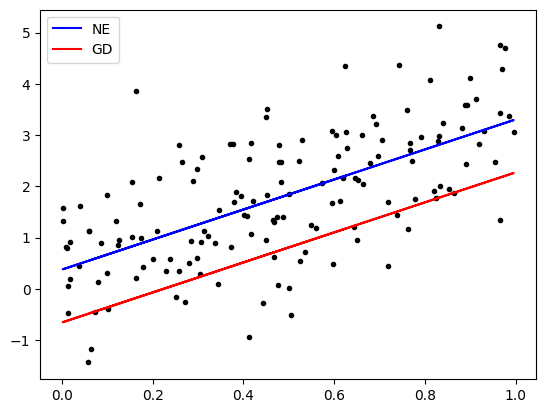

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()

위의 시각화 결과 linear regression 모형의 경우 parameter 학습 방식 중 Normal Equation 방식이 Gradient Descent보다 적합한 것으로 보인다.